In [1]:
import sys
lib_path = '/home/jovyan/libs'
sys.path.insert(0, lib_path)

In [2]:
import os
os.getcwd()

'/home/jovyan/code'

In [4]:
import torch
from utils import audio, attention

from datasets import load_from_disk

In [5]:
dataset = load_from_disk("/home/jovyan/tedlium/validation.hf").with_format("torch").select(range(100))

In [6]:
model, processor = attention.init()

/home/jovyan/libs/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [7]:
print(dataset[10])

{'audio': tensor([ 0.0033,  0.0018,  0.0003,  ...,  0.0005, -0.0027, -0.0020]), 'text': 'if they get surrounded they notice that too they might get a little flustered and they can also sense their motion and tilt'}


In [8]:
example = dataset[10]["audio"]

"""
Promising examples: 2, 3, 4, 10

Not promising examples: 1
""";

In [9]:
encoder_limit = int(example.size(0) / 16000 * 50) + 1
encoder_limit

466

In [10]:
audio.play_audio(example)

In [11]:
_, _, _, _, _, c_attns = attention.inference(example, model, processor, skip_special_tokens=True)

/home/jovyan/libs/_distutils_hack/__init__.py:54: UserWarning: Reliance on distutils from stdlib is deprecated. Users must rely on setuptools to provide the distutils module. Avoid importing distutils or import setuptools first, and avoid setting SETUPTOOLS_USE_DISTUTILS=stdlib. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
WhisperModel is using WhisperSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `layer_head_mask` not None. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


In [1]:
filename = None

cross_filename = None if not filename else filename + "_cross.png"
cross_truncated_filename = None if not filename else filename + "_cross_truncated.png"

# Cross Attentions

In [13]:
c_attns_stacked_cutoff = torch.stack([torch.stack(c).squeeze() for c in c_attns[1:]]).permute(1, 2, 0, 3)[:, :, :, :encoder_limit]
# attention.plot_attns(c_attns_stacked_cutoff, 8, 3, figsize=(30, 80), filename=cross_truncated_filename)

Indices: [14, 90, 244]


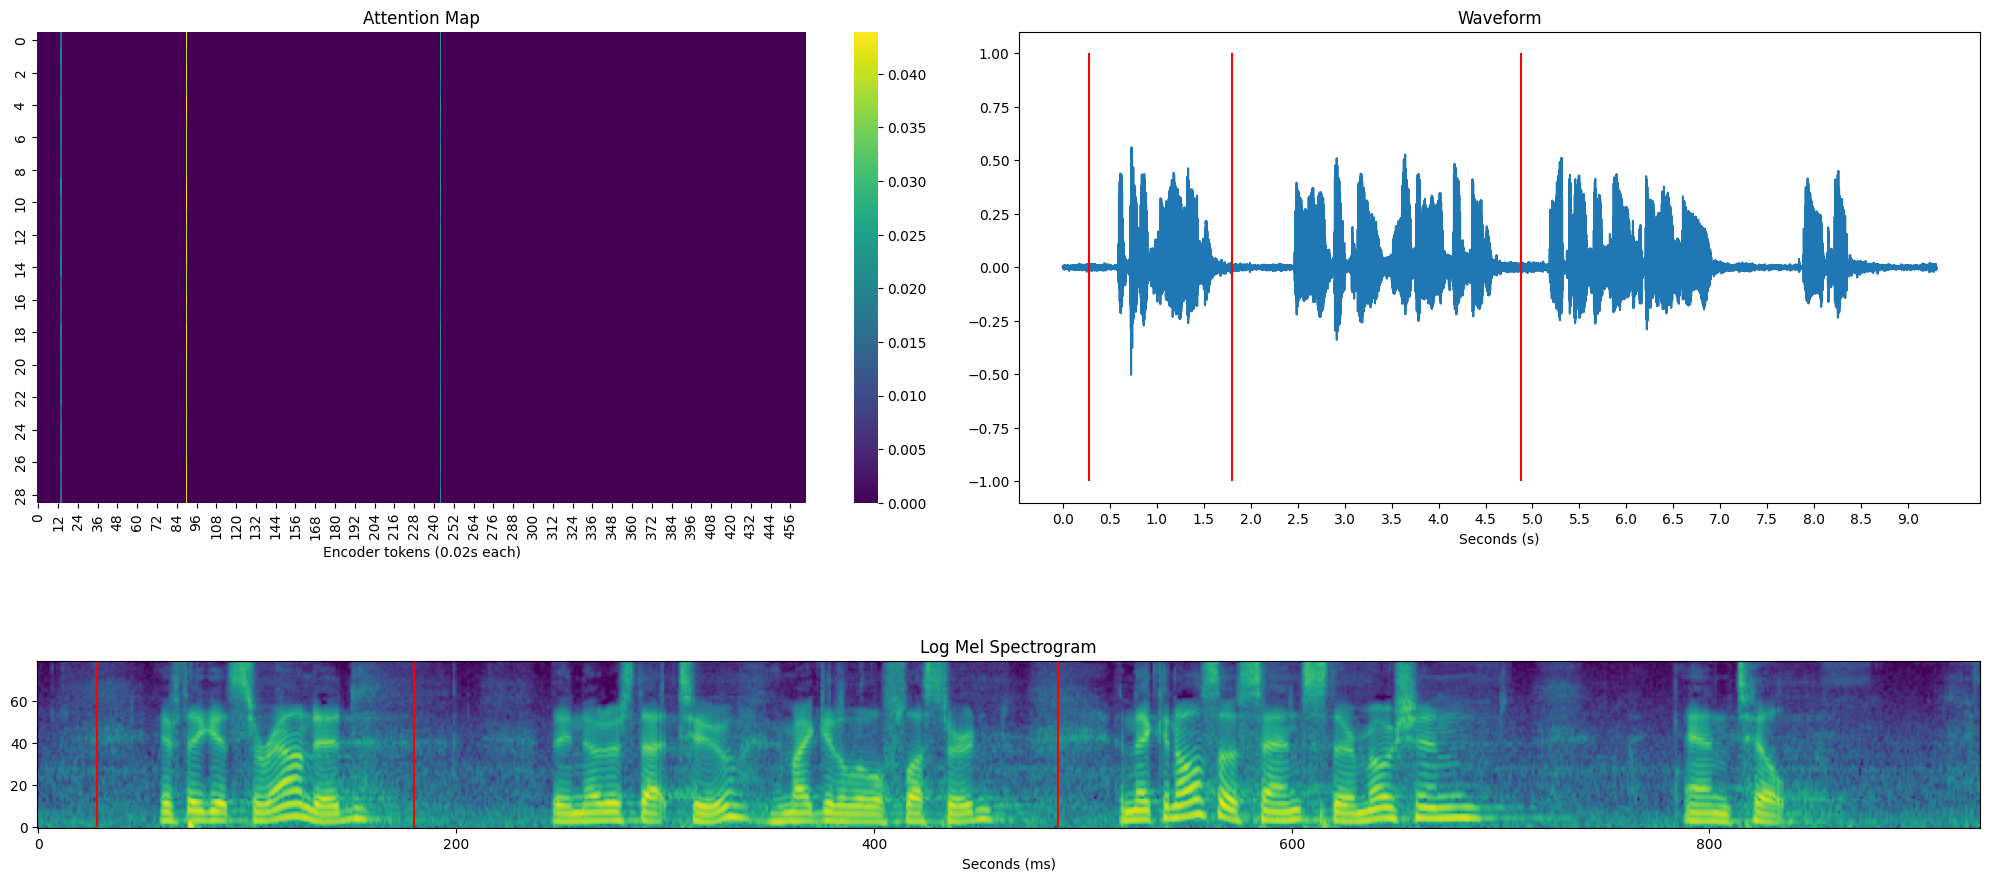

In [14]:
attention.plot_spikes(example, c_attns_stacked_cutoff[0, 2], 0.4, figsize=(20, 10))

100% 24/24 [00:37<00:00,  1.57s/it]


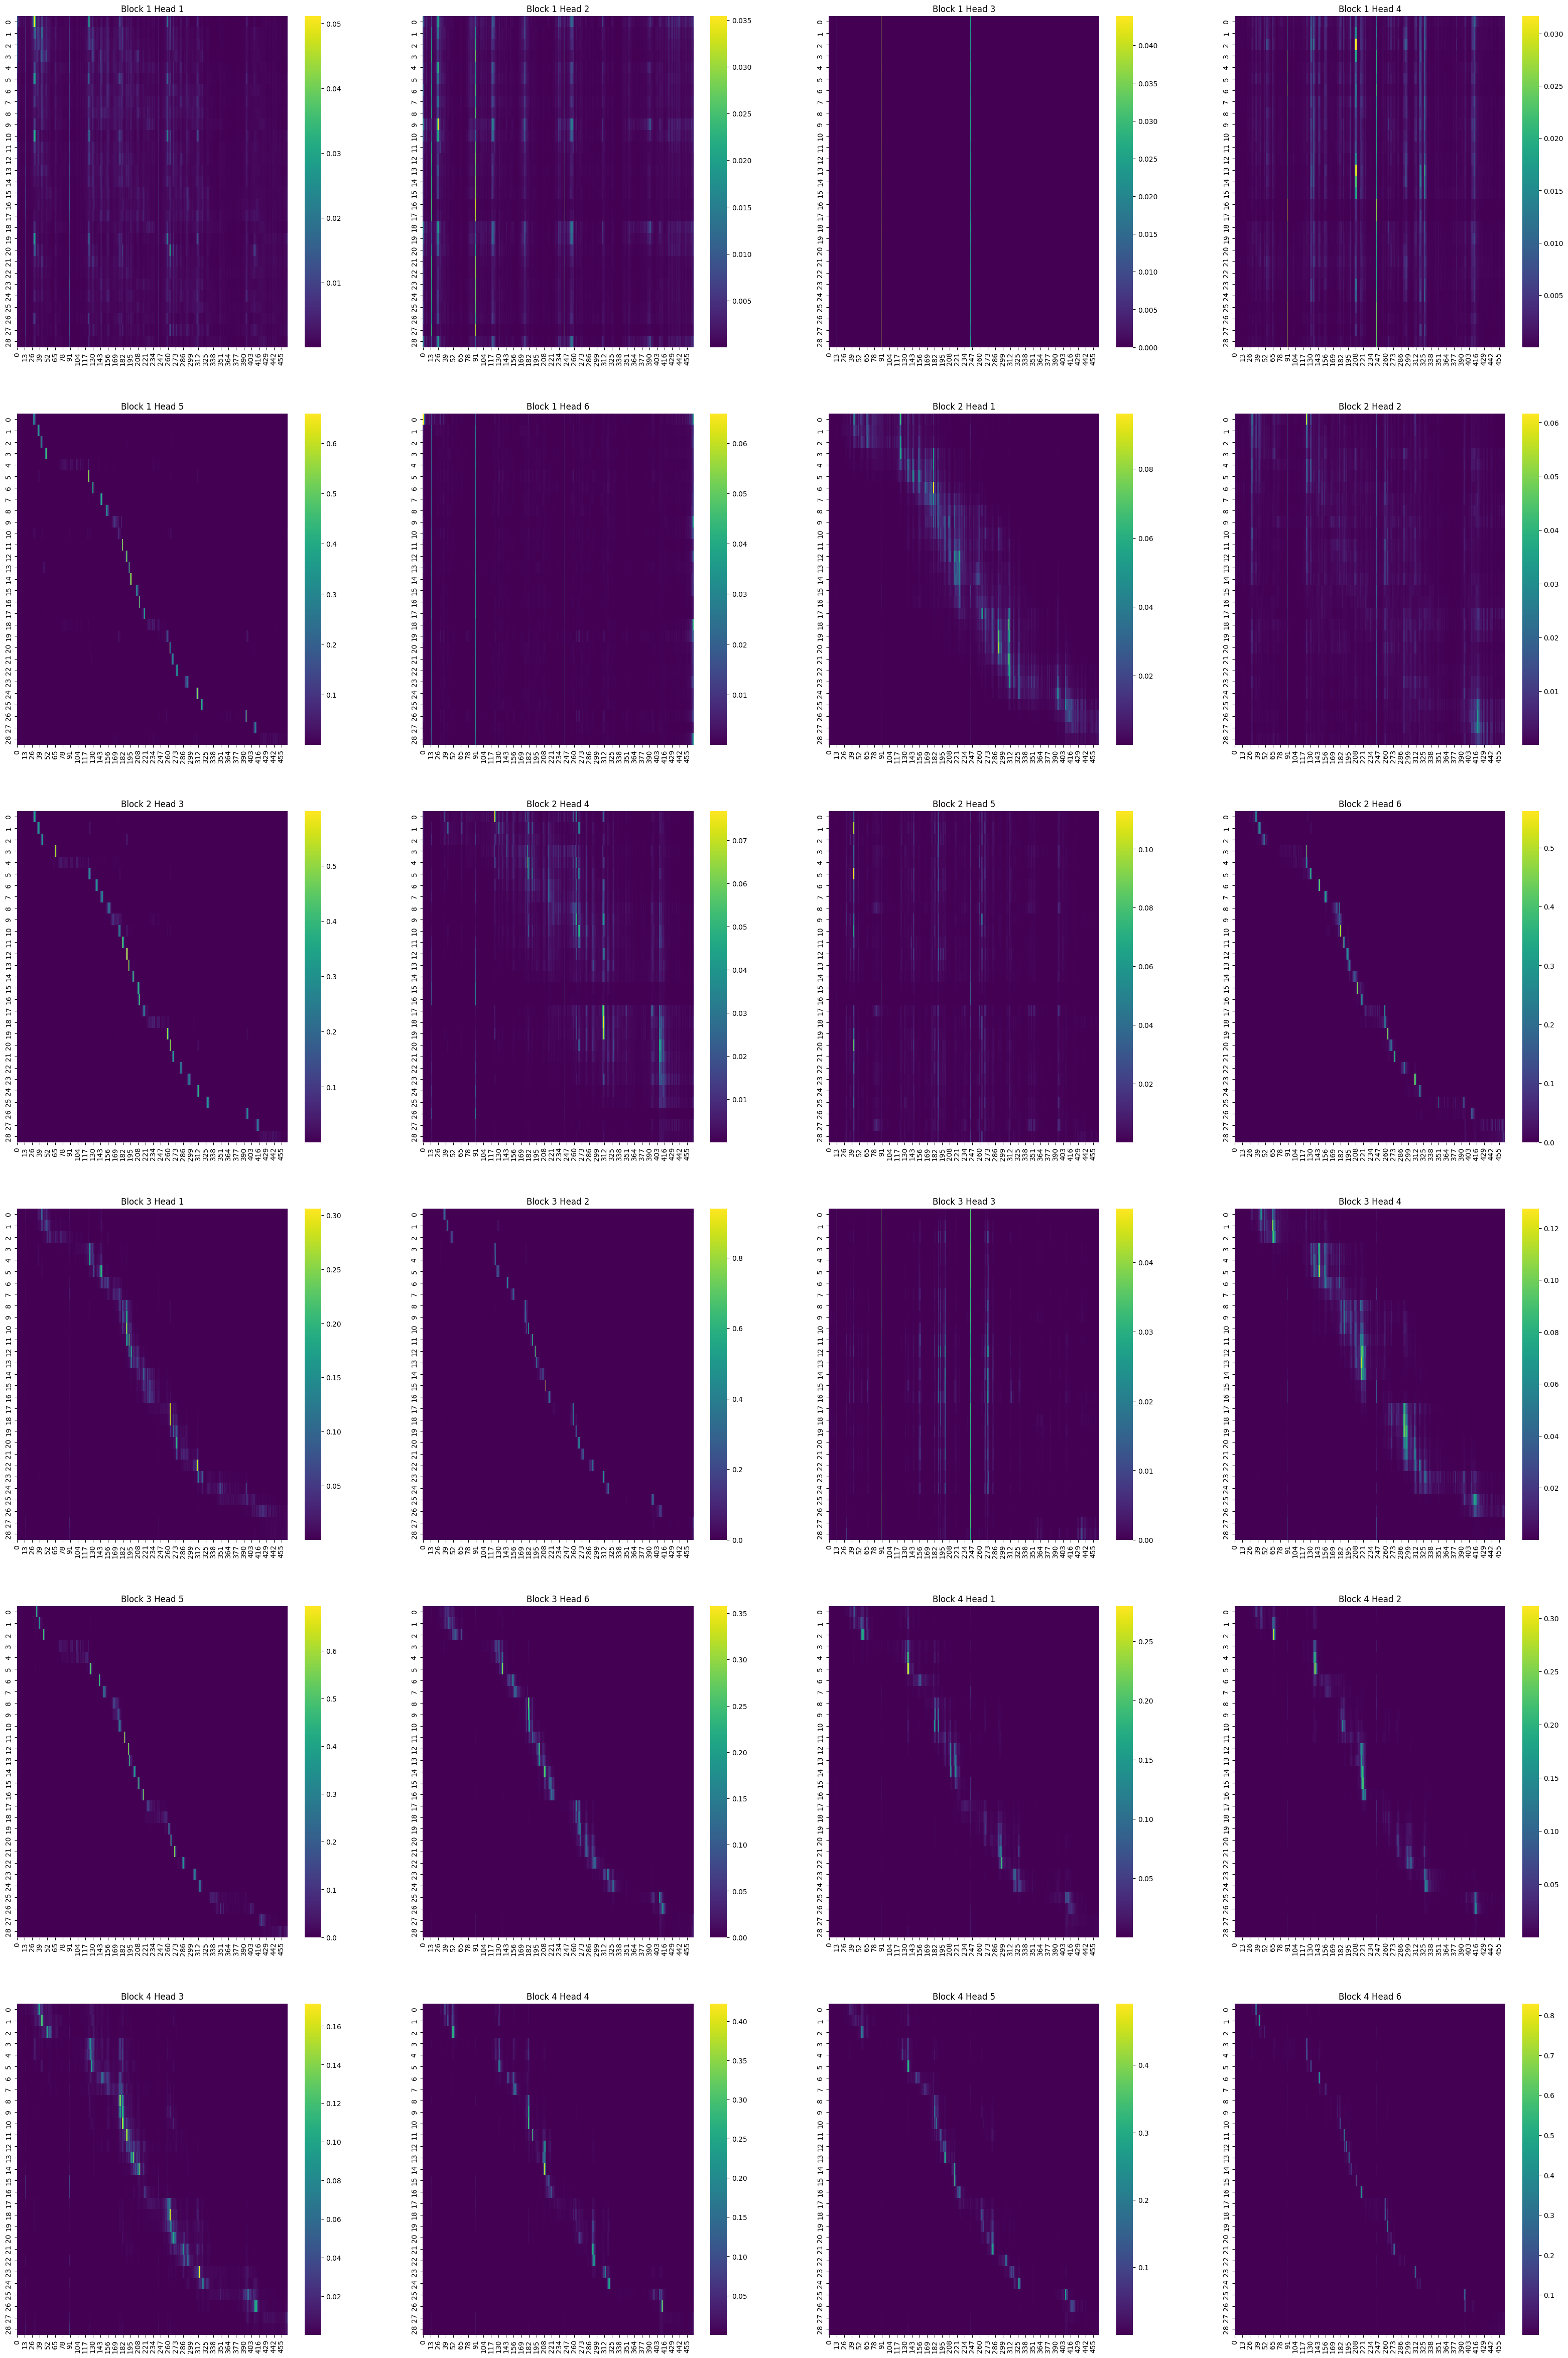

In [16]:
attention.plot_attns(c_attns_stacked_cutoff, 6, 4)

In [ ]:
audio.play_audio(example[43:])